In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = ""
#cuda is disabled due to bug

In [3]:
import torch, tensorflow as tf
torch.backends.cudnn.enabled = True
print("torch:", torch.__version__, "cuda?", torch.cuda.is_available())
print("tf:", tf.__version__)
if torch.cuda.is_available():
    print("GPU(s):", torch.cuda.device_count(), torch.cuda.get_device_name(0))

2025-08-26 17:01:25.943684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-08-26 17:01:25.943730: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


torch: 1.1.0 cuda? False
tf: 2.6.0


In [4]:
print("Torch build:", torch.__version__)
print("CUDA compiled:", torch.version.cuda)
print("cuDNN enabled:", torch.backends.cudnn.enabled)
print("Device count:", torch.cuda.device_count())
print(torch.__version__)


Torch build: 1.1.0
CUDA compiled: 9.0.176
cuDNN enabled: True
Device count: 0
1.1.0


In [5]:
import musicsections

deepsim_model_folder = "musicseg_deepemb/models/deepsim"
fewshot_model_folder = "musicseg_deepemb/models/fewshot"

model_deepsim = musicsections.load_deepsim_model(deepsim_model_folder)
model_fewshot = musicsections.load_fewshot_model(fewshot_model_folder)

audiofile = "audio/testSong.mp3"


2025-08-26 17:01:29.442874: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-26 17:01:29.442944: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Niagui): /proc/driver/nvidia/version does not exist


2025-08-26 17:01:30.412576: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Colocations handled automatically by placer.


/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/beat.py:309: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))
/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/util/utils.py:726: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)
/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/core/time_frequency.py:1081: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifi

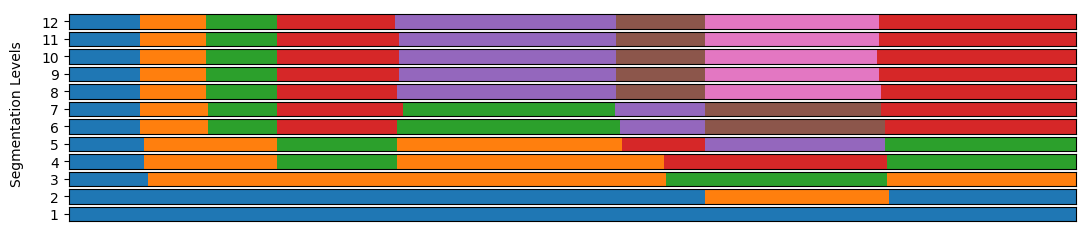

In [6]:
segmentations, features = musicsections.segment_file(
    audiofile, 
    deepsim_model=model_deepsim,
    fewshot_model=model_fewshot,
    min_duration=8,
    mu=0.5,
    gamma=0.5,
    beats_alg="librosa",
    beats_file=None)

musicsections.plot_segmentation(segmentations)

In [7]:
import torch
model = torch.load("musicseg_deepemb/models/fewshot/best_model.tar", map_location="cpu")
print(model.keys())

dict_keys(['epoch', 'state'])


In [8]:
segmentations

[([(0.0, 198.69315192743764)], ['0']),
 ([(0.0, 125.59673469387755),
   (125.59673469387755, 161.84308390022676),
   (161.84308390022676, 198.69315192743764)],
  ['0', '1', '0']),
 ([(0.0, 15.74312925170068),
   (15.74312925170068, 117.81804988662131),
   (117.81804988662131, 161.47156462585033),
   (161.47156462585033, 198.69315192743764)],
  ['2', '0', '1', '0']),
 ([(0.0, 14.953650793650795),
   (14.953650793650795, 41.07609977324263),
   (41.07609977324263, 64.85333333333334),
   (64.85333333333334, 117.42331065759637),
   (117.42331065759637, 161.47156462585033),
   (161.47156462585033, 198.69315192743764)],
  ['2', '0', '3', '0', '1', '3']),
 ([(0.0, 14.953650793650795),
   (14.953650793650795, 41.07609977324263),
   (41.07609977324263, 64.85333333333334),
   (64.85333333333334, 109.2498866213152),
   (109.2498866213152, 125.59673469387755),
   (125.59673469387755, 161.0768253968254),
   (161.0768253968254, 198.69315192743764)],
  ['2', '0', '3', '0', '4', '1', '3']),
 ([(0.0, 14

In [9]:
features

{'Csync': array([[3.09395108, 3.73252801, 4.65542788, ..., 3.33546019, 3.10577791,
         2.27310685],
        [2.01558814, 0.        , 0.        , ..., 0.        , 0.05297349,
         2.90870965],
        [3.41129469, 2.51837141, 1.38282921, ..., 0.08347452, 0.14050791,
         1.55411082],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.05035277, 0.        , 0.        , ..., 0.10861941, 0.232339  ,
         0.        ],
        [0.26321883, 0.00823841, 0.06287851, ..., 1.33033402, 0.91670234,
         0.08558121]]),
 'Msync': array([[0.44606829, 0.44400341, 0.32603704, ..., 0.39158717, 0.41222015,
         0.44330893],
        [0.30971277, 0.32125102, 0.42299474, ..., 0.09299165, 0.30589893,
         0.30965903],
        [0.67844105, 0.72222328, 0.79584449, ..., 0.52651399, 0.55670235,
         0.67825904],
        ...,
        [0.60905468, 0.5864849 , 0.63870698, ..., 0.65857737, 0.43365046,
         0.60578

In [11]:
import librosa as librosa

y, sr = librosa.core.audio.load(audiofile)

tempo, beattrack = librosa.beat.beat_track(y=y, sr=sr)

/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/beat.py:309: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))
/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/util/utils.py:726: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)
/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/core/time_frequency.py:1081: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifi

/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/beat.py:309: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))
/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/util/utils.py:726: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)
/home/niagui/miniconda3/envs/musicseg/lib/python3.7/site-packages/librosa/core/time_frequency.py:1081: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifi

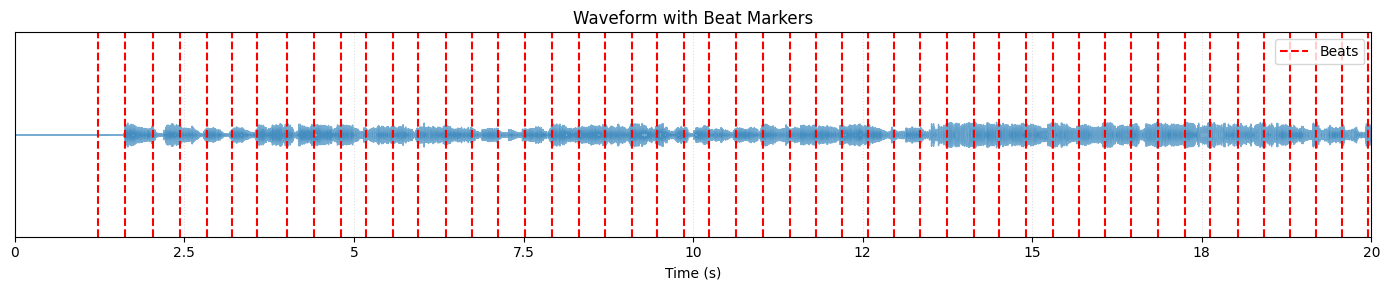

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


y, sr = librosa.load(audiofile)

hop_length = 512
tempo, beattrack = librosa.beat.beat_track(y=y, sr=sr, hop_length=hop_length)
beat_times = librosa.frames_to_time(beattrack, sr=sr, hop_length=hop_length)

#zooming

start_time = 0
end_time = 20
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
y_zoom = y[start_sample:end_sample]

beat_times_zoom = beat_times[(beat_times >= start_time) & (beat_times <= end_time)]

# Plot waveform and beat markers
plt.figure(figsize=(14, 3))
librosa.display.waveplot(y_zoom, sr=sr, alpha=0.6)
plt.vlines(beat_times_zoom, ymin=-1, ymax=1, color='red', linestyles='--', label='Beats')
plt.xlim(start_time, end_time)
plt.ylim(-1, 1)
plt.xlabel("Time (s)")
plt.title("Waveform with Beat Markers")
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.grid(True, axis='x', linestyle=':', alpha=0.4)
plt.show()


In [19]:
beat_times

array([  1.2306576 ,   1.62539683,   2.04335601,   2.43809524,
         2.83283447,   3.20435374,   3.57587302,   4.01705215,
         4.41179138,   4.80653061,   5.17804989,   5.57278912,
         5.94430839,   6.36226757,   6.73378685,   7.12852608,
         7.52326531,   7.91800454,   8.31274376,   8.70748299,
         9.10222222,   9.4737415 ,   9.86848073,  10.24      ,
        10.63473923,  11.02947846,  11.42421769,  11.81895692,
        12.19047619,  12.58521542,  12.95673469,  13.35147392,
        13.74621315,  14.14095238,  14.51247166,  14.90721088,
        15.30195011,  15.69668934,  16.06820862,  16.46294785,
        16.85768707,  17.2524263 ,  17.62394558,  18.04190476,
        18.41342404,  18.80816327,  19.17968254,  19.57442177,
        19.94594104,  20.36390023,  20.75863946,  21.15337868,
        21.52489796,  21.91963719,  22.31437642,  22.70911565,
        23.08063492,  23.4985941 ,  23.87011338,  24.28807256,
        24.68281179,  25.07755102,  25.44907029,  25.84